### Model Experimentation and Evaluation

In this notebook, we focus on experimenting with various machine learning models to predict the arrival times of seismic events using the features extracted from the training dataset.

1. **Data Preparation**:
   - We begin by loading the processed feature dataset (`Features.csv`) and splitting it into training and testing sets.
   - The features are scaled to ensure all models can perform optimally, especially those sensitive to feature scales, such as K-Nearest Neighbors (KNN) and linear models.

2. **Model Selection**:
   - Several regression models are considered for predicting the arrival times of seismic waves. These include:
     - **K-Nearest Neighbors (KNN)**: A simple yet effective method that predicts based on the average of the nearest data points.
     - **Random Forest**: An ensemble model that leverages multiple decision trees for improved accuracy.
     - **Gradient Boosting**: A boosting technique that builds models sequentially to correct errors of previous models.
     - **XGBoost**: An optimized implementation of gradient boosting, known for its efficiency.
     - **AdaBoost**: An adaptive boosting method that focuses on hard-to-predict samples.
     - **Stacking Regressor**: A combination of multiple models to leverage their strengths for better predictions.

3. **Training and Evaluation**:
   - Each model is trained on the training set and evaluated using the testing set. Metrics such as **R² (R-squared)** and **Mean Absolute Error (MAE)** are calculated to determine model performance. These metrics help us assess the accuracy of each model's predictions.
   - **R²** measures the proportion of variance explained by the model, indicating how well the model fits the data.
   - **MAE** represents the average difference between the predicted and actual arrival times, providing an idea of prediction accuracy in practical terms.

4. **Model Comparison**:
   - After evaluating all models, we compare their performance to determine the most suitable model for this task.
   - The best-performing model is chosen based on a combination of high R² scores and low MAE, indicating accurate predictions.



In [ ]:
import pandas as pd

df = pd.read_csv("Features_New_Expanded_Final.csv")

#df = df.drop(columns=['filename', 'event_duration'])
df = df.dropna(axis=1)
df

,arrival,max_sta_lta,max_sta_lta_time,mean_sta_lta,var_sta_lta,mean_amp,max_amp,max_amp_time,second_max_amp,second_max_amp_time,...,min_amp_time,rms_amp,zcr_threshold_time,energy_threshold_time,highest_avg_amplitude1,time_of_occurrence1,highest_avg_amplitude2,time_of_occurrence2,sta_lta_start_time,sta_lta_end_time
0,73499.335,2.374340,37625.811321,1.015039,0.326191,2.723003e-20,7.168520e-09,73991.547170,6.700034e-09,73910.943396,...,73990.943396,3.000852e-10,0.603774,114.566038,1.997950e-09,73800.0,1.821924e-09,73604.528302,474.716981,882.867925
1,12719.560,2.295762,16873.962264,0.995377,0.039389,2.426280e-21,4.337924e-09,13448.905660,4.200714e-09,13575.396226,...,13449.509434,2.318099e-10,0.603774,107.773585,1.177329e-09,13400.0,1.099113e-09,13296.301887,474.716981,1021.283019
2,73019.435,2.374340,24264.150943,0.998502,0.096869,1.216101e-20,5.446156e-09,73572.377358,4.957813e-09,73571.169811,...,73571.773585,2.508909e-10,0.603774,115.471698,1.406583e-09,73400.0,1.254672e-09,73604.528302,474.716981,1388.226415
3,4439.804,2.310864,474.867925,0.994062,0.077505,-4.978128e-21,6.482011e-09,5300.679245,6.272693e-09,5301.886792,...,5301.283019,2.935849e-10,0.603774,111.547170,1.599655e-09,5200.0,1.516537e-09,5223.547170,474.716981,1627.018868
4,52139.340,2.296394,474.716981,0.993744,0.050529,-3.539701e-22,3.570016e-09,52970.113208,3.569771e-09,52405.283019,...,52514.264151,2.289006e-10,0.603774,113.811321,1.276895e-09,52400.0,1.005376e-09,52235.471698,474.716981,1026.264151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,63779.004,2.374246,1219.773585,1.001939,0.458038,1.885967e-23,5.891982e-09,64182.943396,5.762565e-09,64357.283019,...,64491.471698,2.325307e-10,0.603774,94.641509,1.624152e-09,64000.0,1.606981e-09,64107.169811,474.716981,818.867925
71,65699.813,2.363714,696.754717,0.998241,0.258681,-1.125688e-20,5.288960e-08,66322.566038,5.157103e-08,66322.415094,...,66220.377358,1.837439e-09,0.603774,101.886792,1.589473e-08,66200.0,1.296605e-08,66481.509434,537.509434,944.603774
72,36299.543,2.369645,36504.754717,0.989006,0.034921,3.310777e-23,1.034582e-07,37448.301887,9.815816e-08,37443.773585,...,37447.698113,3.437509e-09,0.603774,113.811321,2.634727e-08,37400.0,2.367482e-08,37514.566038,474.716981,1996.679245
73,57779.761,2.373947,723.924528,0.998972,0.174482,-6.691174e-21,6.624310e-09,57892.226415,6.442783e-09,57892.377358,...,57891.773585,1.961781e-10,0.603774,48.754717,1.629851e-09,57800.0,7.766070e-10,57933.886792,474.716981,940.075472


In [ ]:
from sklearn.preprocessing import StandardScaler

features_df_clean = df.drop(columns=['arrival'])


\
scaler = StandardScaler()
features_df_scaled = scaler.fit_transform(features_df_clean)

In [ ]:
from sklearn.model_selection import train_test_split

X = features_df_scaled
y_absolute = df['arrival']
#Split the data for absolute time prediction
X_train_abs, X_test_abs, y_train_abs, y_test_abs = train_test_split(X, y_absolute, test_size=0.2, random_state=42)

### LightGBM Model for Arrival Time Prediction

We train a LightGBM Regressor to predict arrival times, using 200 estimators for better accuracy. The model is evaluated using Mean Absolute Error (MAE) and R² score to determine its prediction performance on the test set.


In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=200, random_state=42)
lgb_model.fit(X_train_abs, y_train_abs)
y_pred_lgb = lgb_model.predict(X_test_abs)

print(f"MAE LightGBM: {mean_absolute_error(y_test_abs, y_pred_lgb)}")
print(f"R^2 LightGBM: {r2_score(y_test_abs, y_pred_lgb)}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 60, number of used features: 18
[LightGBM] [Info] Start training from score 42288.583388
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

### Random Forest Model for Arrival Time Prediction

We use a Random Forest Regressor with 200 estimators to predict arrival times. The model is trained on the training dataset and evaluated using the test set. The performance is assessed using Mean Absolute Error (MAE) and R² score, providing insights into the accuracy and variability explained by the model.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#Set up the RandomForest Regressor
rf_model_abs = RandomForestRegressor(n_estimators=200, random_state=42)
#Train the model on absolute time prediction
rf_model_abs.fit(X_train_abs, y_train_abs)

#Predict on the test set
y_pred_abs = rf_model_abs.predict(X_test_abs)

#Evaluate the model performance
mae_abs = mean_absolute_error(y_test_abs, y_pred_abs)
r2_abs = r2_score(y_test_abs, y_pred_abs)

print(f'Mean Absolute Error (Absolute Time): {mae_abs}')
print(f'R^2 Score (Absolute Time): {r2_abs}')

Mean Absolute Error (Absolute Time): 6939.525109476172
R^2 Score (Absolute Time): 0.5498970655221442


### Comparing Different Regression Models for Arrival Time Prediction

To determine the most suitable model for predicting arrival times, we evaluated several regression algorithms:

- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **AdaBoost Regressor**
- **Decision Tree Regressor**
- **K-Nearest Neighbors Regressor**
- **XGBoost Regressor**

Each model was trained on the training dataset and tested on the test set. We assessed their performance using two metrics:
- **Mean Absolute Error (MAE):** Measures the average magnitude of errors in predictions, giving an idea of the model's accuracy.
- **R² Score:** Indicates the proportion of the variance in the target variable that is predictable from the input features.


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = [
    ("RandomForest", RandomForestRegressor(n_estimators=200, random_state=42)),
    ("GradientBoosting", GradientBoostingRegressor(n_estimators=200, random_state=42)),
    ("AdaBoost", AdaBoostRegressor(n_estimators=200, random_state=42)),
    ("DecisionTree", DecisionTreeRegressor(random_state=42)),
    ("KNeighbors", KNeighborsRegressor(n_neighbors=5)),
    ("XGBoost", XGBRegressor(n_estimators=200, random_state=42))
]


for name, model in models:

    model.fit(X_train_abs, y_train_abs)


    y_pred_abs = model.predict(X_test_abs)

    mae_abs = mean_absolute_error(y_test_abs, y_pred_abs)
    r2_abs = r2_score(y_test_abs, y_pred_abs)


    print(f'{name}:')
    print(f'  Mean Absolute Error (Absolute Time): {mae_abs}')
    print(f'  R^2 Score (Absolute Time): {r2_abs}')
    print('-' * 40)


RandomForest:
  Mean Absolute Error (Absolute Time): 6939.525109476172
  R^2 Score (Absolute Time): 0.5498970655221442
----------------------------------------
GradientBoosting:
  Mean Absolute Error (Absolute Time): 6659.004263072035
  R^2 Score (Absolute Time): 0.5764582317701992
----------------------------------------
AdaBoost:
  Mean Absolute Error (Absolute Time): 10712.492652400193
  R^2 Score (Absolute Time): 0.36555126967894025
----------------------------------------
DecisionTree:
  Mean Absolute Error (Absolute Time): 7752.02886666667
  R^2 Score (Absolute Time): 0.555537940668252
----------------------------------------
KNeighbors:
  Mean Absolute Error (Absolute Time): 7339.115826666663
  R^2 Score (Absolute Time): 0.7161930378278824
----------------------------------------
XGBoost:
  Mean Absolute Error (Absolute Time): 7865.440441406249
  R^2 Score (Absolute Time): 0.5306958555773921
----------------------------------------


### Stacking Regressor for Arrival Time Prediction

To improve prediction accuracy, we employed a **Stacking Regressor**, which combines multiple models. Stacking allows us to use several base models and a meta-model to make the final prediction. The base models used in this experiment include:

- **Random Forest Regressor**
- **XGBoost Regressor**
- **AdaBoost Regressor**
- **K-Nearest Neighbors Regressor**

The **meta-model**, which learns from the outputs of the base models, is a **Linear Regression** model.

We evaluated the Stacking Regressor using:

- **Mean Absolute Error (MAE):** Provides the average difference between predicted and actual arrival times.
- **R² Score:** Indicates the proportion of variability explained by the model.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=200, random_state=42)),
    ('adaboost', AdaBoostRegressor(n_estimators=200, random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=5))
]

#Define the meta-model (or final estimator)
meta_model = LinearRegression()

#Create the Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

#Train the stacking model
stacking_model.fit(X_train_abs, y_train_abs)

#Predict on the test set using the stacking model
y_pred_abs = stacking_model.predict(X_test_abs)

#Evaluate the model performance
mae_abs = mean_absolute_error(y_test_abs, y_pred_abs)
r2_abs = r2_score(y_test_abs, y_pred_abs)

#Print the results
print('Stacking Regressor:')
print(f'Mean Absolute Error (Absolute Time): {mae_abs}')
print(f'R^2 Score (Absolute Time): {r2_abs}')


Stacking Regressor:
Mean Absolute Error (Absolute Time): 7745.260080931198
R^2 Score (Absolute Time): 0.5801971040059586


### Feature Importance Visualization for Absolute Time Prediction

To understand which features contribute the most to predicting the **absolute arrival time**, we analyzed the **feature importance** using the **Random Forest Regressor**. Random Forest provides a measure of how much each feature contributes to reducing the error when making predictions.

In this analysis, we plotted the feature importance scores to highlight which features play an important role in the model's decisions. The **bar plot** shows the relative importance of each feature, letting us decide which variable to keep and which to drop.


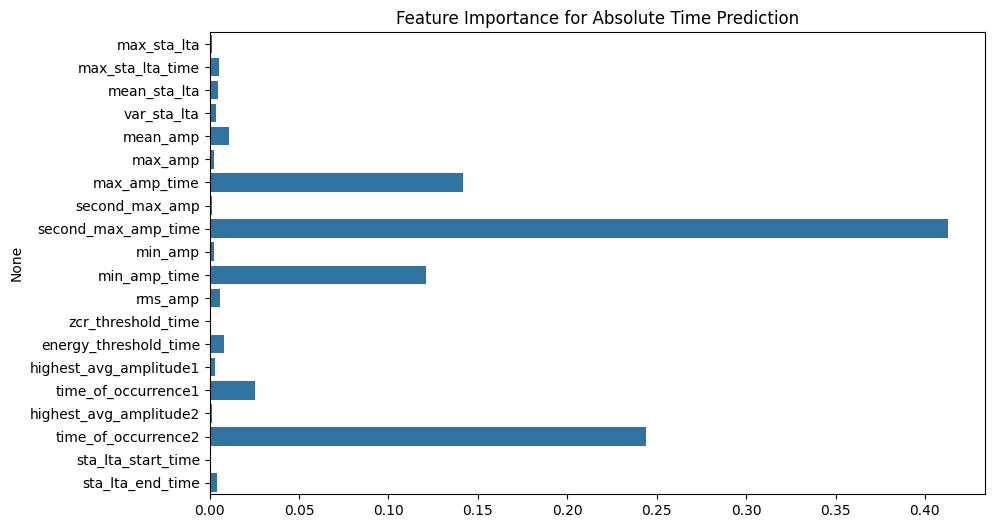

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf_model_abs.feature_importances_
feature_names = features_df_clean.columns

#Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for Absolute Time Prediction')
plt.show()

### Evaluating Feature Importance with Permutation Importance for the KNN Model

In this section, we used **permutation importance** to analyze the **K-Nearest Neighbors (KNN)** model. Unlike tree-based models, KNN does notprovide feature importance scores. So we used permutation importance to understand how much each feature contributes to the model's predictions.

**Permutation importance** measures the impact of shuffling a feature on the prediction error. If shuffling a feature causes a significant increase in the error, that feature is considered important for the model.

The steps involved in this analysis are:

1. **Training the KNN Model:** We trained a KNN regressor using the training data to predict the **arrival time**.
2. **Calculating Permutation Importance:** Using repeated shuffling of features, we calculated the mean permutation importance for each feature.
3. **Model Evaluation:** We evaluated the model performance using **Mean Absolute Error (MAE)** and **R² score** to assess its accuracy.
4. **Visualization:** We plotted the permutation importance scores using a bar plot, which provides a visual representation of the most influential features in the KNN model.



XGBoost:
  Mean Absolute Error (Absolute Time): 7339.115826666663
  R^2 Score (Absolute Time): 0.7161930378278824
----------------------------------------


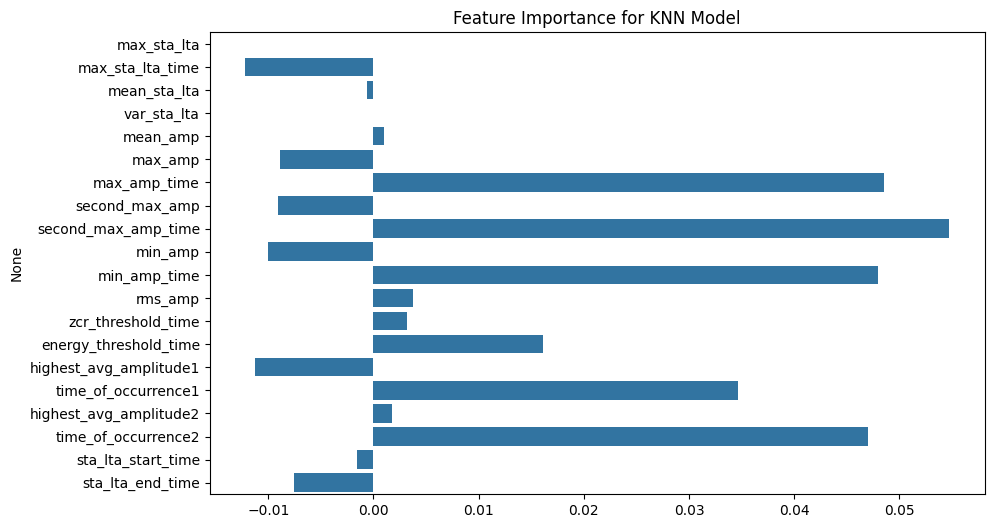

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsRegressor

#Fit the KNN model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_abs, y_train_abs)

#Calculate permutation importances
result = permutation_importance(knn_model, X_train_abs, y_train_abs, n_repeats=10, random_state=42)

y_pred_abs = knn_model.predict(X_test_abs)

#Evaluate the model performance
mae_abs = mean_absolute_error(y_test_abs, y_pred_abs)
r2_abs = r2_score(y_test_abs, y_pred_abs)

#Print the results
print(f'{name}:')
print(f'  Mean Absolute Error (Absolute Time): {mae_abs}')
print(f'  R^2 Score (Absolute Time): {r2_abs}')
print('-' * 40)

importances = result.importances_mean
feature_names = features_df_clean.columns

#Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance for KNN Model')
plt.show()